# Helical State

Author: Mark Vousden

Purpose: not clear, please add. 

In [1]:
import dolfin as df
from math import pi, sin, cos
from finmag.util.helpers import vector_valued_function
from finmag.util.visualization import plot_dolfin_function

[2014-09-12 16:00:06] INFO: Finmag logging output will be appended to file: '/home/mb4e10/.finmag/global.log'
[2014-09-12 16:00:06] DEBUG: Building modules in 'native'...
[2014-09-12 16:00:07] DEBUG: FinMag          5453:7af0ebbcbc57aca5bd969bcbccca07cb0537b437
[2014-09-12 16:00:07] DEBUG: Dolfin          1.4.0                Matplotlib      1.3.1               
[2014-09-12 16:00:07] DEBUG: Numpy           1.8.1                Scipy           0.14.0              
[2014-09-12 16:00:07] DEBUG: IPython         2.1.0                Python          2.7.6               
[2014-09-12 16:00:07] DEBUG: Paraview        4.0.1-1ubuntu1       Sundials        2.5.0               
[2014-09-12 16:00:07] DEBUG: Boost-Python    <unknown>            Linux           Ubuntu 14.04.1 LTS  
[2014-09-12 16:00:07] DEBUG: Registering debug signal handler. Press Ctrl-Z at any time to stop execution and jump into the debugger.


Material paramaters of FeGe.

In [2]:
alpha = 0.05
A = 8.78e-12  # J/m
D = 1.58e-3  # J/m^2
Ms = 3.84e5  # A/m

Mesh.

In [3]:
unit_length = 1e-9
radius = 100e-9
maxh = 5e-9
x0, y0 = 0, 0
x1, y1 = 100, 100
nx, ny = 20, 20
#mesh = df.CircleMesh(df.Point(0, 0), radius, maxh)
mesh = df.RectangleMesh(x0, y0, x1, y1, nx, ny)

In [4]:
mesh.coordinates().shape

(441, 2)

Description of helical state.

In [5]:
def helical_state(pos):
    """
    Description of helical state with propagation direction +x.

    """
    x = pos[0]
    helical_period = (4 * pi * A / D) / unit_length
    k = 2 * pi / helical_period

    mx = 0
    my = cos(k * x)
    mz = sin(k * x)
    return (mx, my, mz)

Visualising the helical state.

In [6]:
m = vector_valued_function(helical_state, mesh)

The next line didn't work for me (Hans, Finmag Friday 6 June 2014), so I tried to replace the plot with the (long!) code below. Not ideal at all. The question is, what do we learn from this example and that plot? Mark, can you review what would be good here?

I re-executed the notebook and the plot seems to work for me, so I removed the matplotlib version again. But a comment about what the notebook is supposed to show would be good indeed. (Max, 9.6.2014)

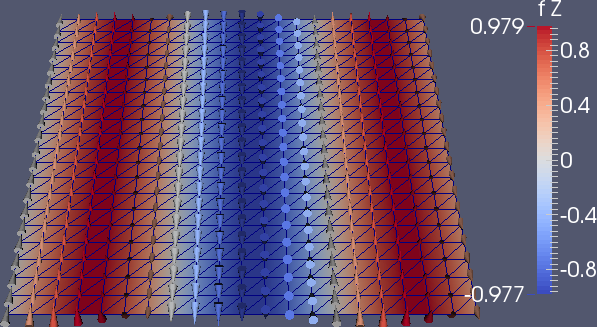

In [8]:
plot_dolfin_function(m, color_by_axis=2, use_display=0)